<a href="https://colab.research.google.com/github/baoloc97/Data-science/blob/main/FinalORC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install torch torchvision torchaudio
!pip install easyocr

     |████████████████████████████████| 1.9MB 4.9MB/s 
     |████████████████████████████████| 63.2MB 43kB/s 


In [ ]:
!unzip Ban_product.zip -d 'train/ban'

In [3]:
!unzip Test_banproduct.zip -d 'train/Test_ban'

Archive:  Test_banproduct.zip
  inflating: train/Test_ban/0.jpg    
  inflating: train/Test_ban/1.jpg    
  inflating: train/Test_ban/2.jpg    
  inflating: train/Test_ban/3.jpg    
  inflating: train/Test_ban/4.jpg    
  inflating: train/Test_ban/5.jpg    
  inflating: train/Test_ban/6.jpg    
  inflating: train/Test_ban/7.jpg    
  inflating: train/Test_ban/8.jpg    
  inflating: train/Test_ban/9.jpg    
  inflating: train/Test_ban/10.jpg   
  inflating: train/Test_ban/11.jpg   
  inflating: train/Test_ban/12.jpg   
  inflating: train/Test_ban/13.jpg   
  inflating: train/Test_ban/14.jpg   
  inflating: train/Test_ban/15.jpg   
  inflating: train/Test_ban/16.jpg   


In [6]:
import easyocr
import os
import cv2
from matplotlib import pyplot as pyplot
import numpy as np

In [16]:
def CountBlank(conga):
	count =0
	for i in range(len(conga)):
		if (conga[i]==" "):
			count+=1	
	return count		

def CombineSingle(string):
	condition = len(string)-1
	condition = condition/2
	temp = CountBlank(string)
	if temp == condition:
		string = string.replace(" ","")
	return string	
def Preprocessing(result):
  text= [result[i][1] for i in range(len(result))]
  text = [CombineSingle(text[i]) for i in range(len(text)) ]
  string= ' '.join(text)
  return string
  

In [31]:
DIRECTORY = r'train'
CATEGORIES = ['Test_ban']
data = []
!rm -rf 'train/Test_ban/.ipynb_checkpoints'

In [34]:
f = open('text_ban.txt','w')
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        print(img_path)
        label = CATEGORIES.index(category)
        img_final = cv2.imread(img_path)
        gray = cv2.cvtColor(img_final,cv2.COLOR_BGR2GRAY)
        gray_new = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
        width = 900
        height = 900 # keep original height
        dim = (width, height)
        resized = cv2.resize(gray_new, dim, interpolation = cv2.INTER_AREA)
        final_picture2 = cv2.rotate(resized, cv2.ROTATE_90_COUNTERCLOCKWISE)
        final_picture1 = cv2.rotate(resized, cv2.ROTATE_90_CLOCKWISE)
        final_picture0 = resized
        reader = easyocr.Reader(['en'],gpu=True)
        # result = []
        result0 = reader.readtext(final_picture0)
        result1 = reader.readtext(final_picture1)
        result2 = reader.readtext(final_picture2)
        string0 = Preprocessing(result0)
        string1 = Preprocessing(result1) 
        string2 = Preprocessing(result2)
        final_string = string0+' '+string1+' '+string2
        print(final_string)
        f.write(final_string)
        #final_string = final_string.replace('"',"")


train/Test_ban/2.jpg
train/Test_ban/3.jpg
train/Test_ban/0.jpg
train/Test_ban/8.jpg
train/Test_ban/6.jpg
train/Test_ban/1.jpg
train/Test_ban/10.jpg
train/Test_ban/7.jpg
train/Test_ban/4.jpg
train/Test_ban/9.jpg
train/Test_ban/5.jpg


In [ ]:
print(len(data))

True

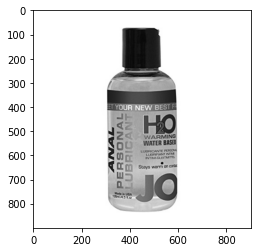

In [89]:
# mình resize rồi đổi màu xám 

img_final = cv2.imread('image/103.jpg')
gray = cv2.cvtColor(img_final,cv2.COLOR_BGR2GRAY)
gray_new = cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)
width = 900
height = 900 # keep original height
dim = (width, height)
resized = cv2.resize(gray_new, dim, interpolation = cv2.INTER_AREA)
final_picture2 = cv2.rotate(resized, cv2.ROTATE_90_COUNTERCLOCKWISE)
final_picture1 = cv2.rotate(resized, cv2.ROTATE_90_CLOCKWISE)
final_picture0 = resized
pyplot.imshow(final_picture0)
cv2.imwrite('Conga0.jpg',final_picture0)
cv2.imwrite('Conga1.jpg',final_picture1)



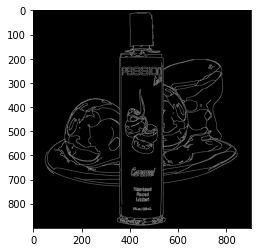

In [ ]:
# này để test khỏi chạy,bỏ noise đưa về dạng đường viền
bfilter =cv2.bilateralFilter(resized,11,17,17)
edged = cv2.Canny(bfilter,30,200)
#pyplot.imshow(edged)
pyplot.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))
final_picture = cv2.cvtColor(edged,cv2.COLOR_BGR2RGB)

In [78]:
reader = easyocr.Reader(['en'],gpu=True)
# result = []
result0 = reader.readtext(final_picture0)
result1 = reader.readtext(final_picture1)
result2 = reader.readtext(final_picture2)
# result.append(result0)
# result.append(result1)
# result.append(result2)


In [7]:
def CountBlank(conga):
	count =0
	for i in range(len(conga)):
		if (conga[i]==" "):
			count+=1	
	return count		

def CombineSingle(string):
	condition = len(string)-1
	condition = condition/2
	temp = CountBlank(string)
	if temp == condition:
		string = string.replace(" ","")
	return string	

 

In [79]:
print(len(result0))
print(len(result1))
print(len(result2))

16
10
9


In [94]:
def Preprocessing(result):
  text= [result[i][1] for i in range(len(result))]
  text = [CombineSingle(text[i]) for i in range(len(text)) ]
  string= ' '.join(text)
  return string
string0 = Preprocessing(result0)
string1 = Preprocessing(result1) 
string2 = Preprocessing(result2)

  
final_string = string0+' '+string1+' '+string2
final_string = final_string.replace('"',"")
print(final_string)

Etyour NEW BEST FF WARMING WATER BASED 1 P LUUAICANTE Ntim GLFITMIL LENIFANT PERO Nc Stays wocm On 1k5 #runn Ved Ld JO ot ANAL i WPERSGNAL JE LUBRICANT 8 3 2 SHi 8 8 1ljg 4 LNyoidantg 3 7VNosaad 0 JVNV I


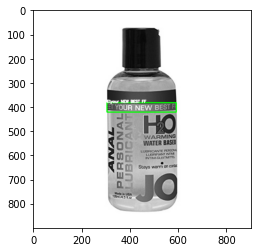

In [81]:
top_left = tuple(result0[0][0][0])
bottom_right = tuple(result0[0][0][2])
text = result0[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
IMAGE_PATH = 'Test/Conga.jpg'
img = cv2.imread(IMAGE_PATH)

img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
pyplot.imshow(img)
pyplot.show()

In [90]:
#Draw box
top_left = tuple(result1[0][0][0])
bottom_right = tuple(result1[0][0][2])
print(bottom_right)
text = result1[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
IMAGE_PATH = 'Test/Conga.jpg'
img = cv2.imread('Test/Conga1.jpg')



(421, 341)


In [60]:
def ConverInt(Tupple2):
  return int(Tupple2[0]), int(Tupple2[1])


True

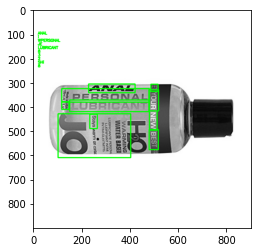

In [91]:

spacer = 100
for detection in result1:
    top_left = tuple(detection[0][0])
    top_left = ConverInt(top_left)
    bottom_right = tuple(detection[0][2])
    bottom_right = ConverInt(bottom_right)
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
pyplot.imshow(img)  
cv2.imwrite('Conga3.jpg',img)